# 2022 NZMSA Data Science Submission.

In [418]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Exploratory Data Analysis.

In [419]:
dataset = pd.read_csv("weather-data.csv")
dataset.head() # Show the first five results.

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [420]:
# Description
# Mean - Avg value of data
# std - data standard deviation
# min - data minimum
# 25% - data value from 25th percentile
# 50% - data value from 50th percentile
# 75% - data value from 75th percentile

dataset.describe()

,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000,0.0
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
min,2.000000,-2.000000,29.230000,0.000000,13.000000,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
50%,16.000000,12.000000,81.990000,8.000000,31.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN
max,29.000000,23.000000,100.000000,42.000000,56.000000,NaN


In [421]:
# Checks for null-values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0    station        103713 non-null  object 
 1   valid           103713 non-null  object 
 2   tmpc            103678 non-null  float64
 3   dwpc            103678 non-null  float64
 4   relh            103593 non-null  float64
 5   sknt            103704 non-null  float64
 6   gust            1203 non-null    float64
 7   peak_wind_drct  0 non-null       float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB


<AxesSubplot:>

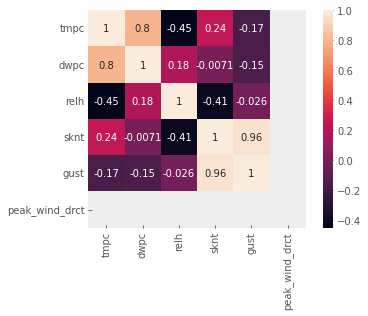

In [422]:
# Correlation plot
# A value near one or negative one may have a pattern wher a(x) = k*b(x)
# a value near 0 means that there is no pattern between a(x) and b(x)
sns.heatmap(dataset.corr(), annot=True, square=True)

C:\Users\Ben\AppData\Local\Temp\ipykernel_30760\2936352485.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


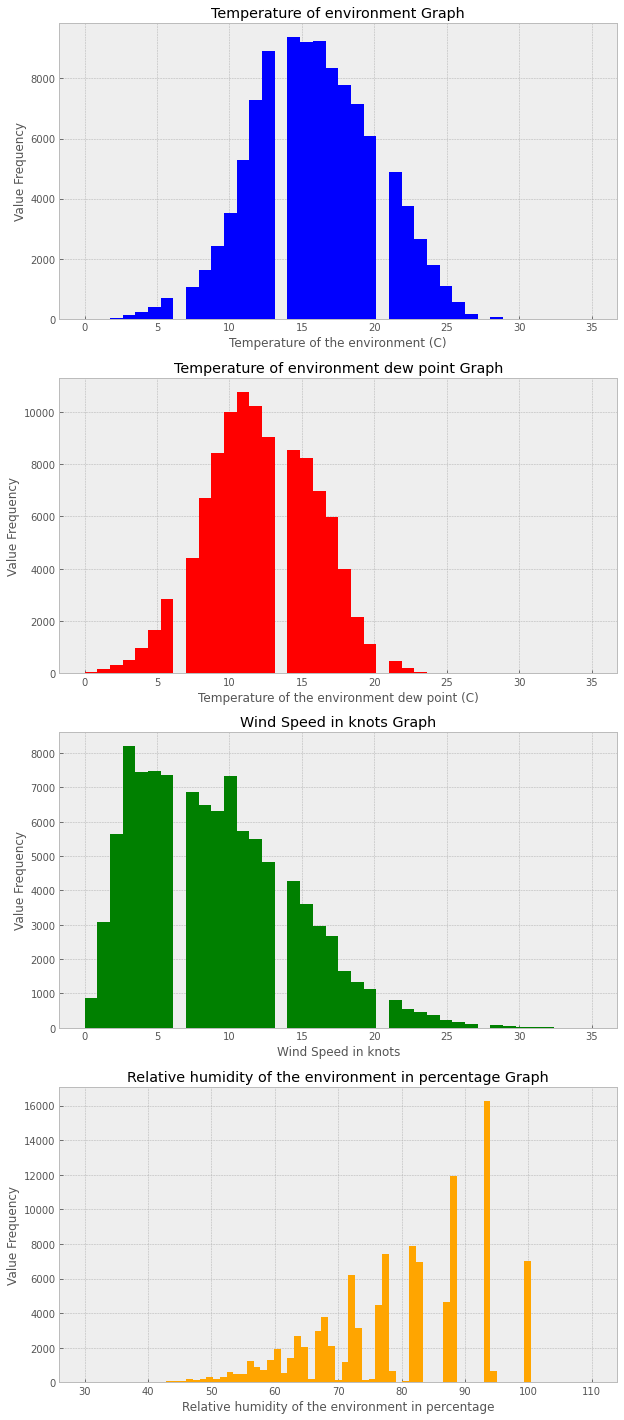

In [423]:
# Graphs
plt.style.use('bmh')
fig1, (tempenv, tempdew, spdk, humid) = plt.subplots(nrows=4,ncols=1, squeeze = True)

tempenv.hist(dataset["tmpc"],40,(0,35) , histtype='bar', color='blue',
         rwidth = 1)
tempenv.set_title("Temperature of environment Graph")
tempenv.set_xlabel("Temperature of the environment (C)")
tempenv.set_ylabel("Value Frequency")


tempdew.hist(dataset["dwpc"],40,(0,35) , histtype='bar', color='red',
         rwidth = 1)
tempdew.set_title("Temperature of environment dew point Graph")
tempdew.set_xlabel("Temperature of the environment dew point (C)")
tempdew.set_ylabel("Value Frequency")


spdk.hist(dataset["sknt"],40,(0,35) , histtype='bar', color='green',
         rwidth = 1)
spdk.set_title("Wind Speed in knots Graph")
spdk.set_xlabel("Wind Speed in knots")
spdk.set_ylabel("Value Frequency")

humid.hist(dataset["relh"],75,(30,110) , histtype='bar', color='orange',
         rwidth = 1)
humid.set_title("Relative humidity of the environment in percentage Graph")
humid.set_xlabel("Relative humidity of the environment in percentage")
humid.set_ylabel("Value Frequency")

fig1.set_size_inches(10,25)
fig1.show()



# Plot Comments:
## Environmental Temperature in celcius - 
* Data is normally distributed.
* Minimum is 2 degrees celcius
* Maximum is 29 degrees celcius
* Mean average is 16 degrees celcius
## Dew temperature in celcius -
* Data is normally distributed.
* Minimum is -2 degrees celcius
* Maximum is 23 degrees celcius
* Mean average is 12 degrees celcius
## Speed in Knots - 
* Data is left skewed
* Minimum is 29 knots
* Maximum is 42 knots
* Median average is 9 knots (Using the median because of the graph skewness)
## Relative humidity of the environment in percentage - 
* Data is right skewed
* Minimum is 29%
* Maximum is 100%
* Median average is 80% (Using the median because of the graph skewness)

# Data Processing

In [424]:
# An exhaustive list of what you can do with Pandas dataframe is in this link: https://pandas.pydata.org/docs/reference/frame.html

dataset.head() # Show the first five results.

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [425]:
# take out useless columns, station, gust, peak wind direction
dataset.drop(columns=[" station","gust", "peak_wind_drct"], inplace=True)
dataset.head()

,valid,tmpc,dwpc,relh,sknt
0,2015-01-01 00:00,21.0,11.0,52.77,15.0
1,2015-01-01 00:30,21.0,10.0,49.37,16.0
2,2015-01-01 01:00,21.0,12.0,56.38,16.0
3,2015-01-01 01:30,21.0,13.0,60.21,16.0
4,2015-01-01 02:00,21.0,12.0,56.38,16.0


In [426]:
# Process data
# replace null values that are found, with values from previous 
# field and check they are all gone
# convert valid into hours from start of recording, i.e recorded every half our
dataset.info()
dataset = dataset.fillna(method="pad")
dataset.isnull().sum()


timeToHours = []
currentHours = 0
for i in range(len(dataset["valid"])):
    currentHours += 0.5
    timeToHours.append(currentHours)

dataset['valid']= timeToHours

dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   valid   103713 non-null  object 
 1   tmpc    103678 non-null  float64
 2   dwpc    103678 non-null  float64
 3   relh    103593 non-null  float64
 4   sknt    103704 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.0+ MB


,valid,tmpc,dwpc,relh,sknt
0,0.5,21.0,11.0,52.77,15.0
1,1.0,21.0,10.0,49.37,16.0
2,1.5,21.0,12.0,56.38,16.0
3,2.0,21.0,13.0,60.21,16.0
4,2.5,21.0,12.0,56.38,16.0


In [427]:
from sklearn.model_selection import train_test_split

# create the training and testing data
X_train, X_test, y_train, y_test = train_test_split( dataset[["valid"]], dataset[["tmpc","dwpc","relh","sknt"]], test_size=0.2)

X_train.info()
X_test.info()
y_train.info()
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82970 entries, 30478 to 2194
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   valid   82970 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20743 entries, 30387 to 3488
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   valid   20743 non-null  float64
dtypes: float64(1)
memory usage: 324.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 82970 entries, 30478 to 2194
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmpc    82970 non-null  float64
 1   dwpc    82970 non-null  float64
 2   relh    82970 non-null  float64
 3   sknt    82970 non-null  float64
dtypes: float64(4)
memory usage: 3.2 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20743 entries, 30387 to 3488
Data columns (total 4 

# Comments on dataframe changes
* we removed columns, station, gust, peak wind direction, as these were contained mostly useless values or were irrelevant.
* We replaced the valid column containing the date with hours so the model could be fit and scored.
* Null values were replaced with the preceeding value, otherwise the dataset could not be trained on.
* The training and testing data was split so that the model is not trained and tested on the same dataset

# Data Modelling

In [428]:
# An exhaustive list of models can be found in sci-kit learn in this link: https://scikit-learn.org/stable/supervised_learning.html
# The url takes you to supervised learning which is what you will be dealing with for this phase.

from sklearn.neighbors import KNeighborsRegressor


In [429]:
# Fitting the model
model = KNeighborsRegressor(n_neighbors = 3)
model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [430]:
# Model Score
model.score(X_test,y_test)

0.9401349085829251

In [431]:
# creating the next month dataframe, from the last hour
# a month is 730 hours. so 1460 is the range and start from initial hours 51656.5
dataset.tail
monthDataframe = []
currentHours = 0
for i in range(1536):
    currentHours += 0.5
    monthDataframe.append(currentHours)

monthDataframe_df = pd.DataFrame(monthDataframe, columns=["valid"])
prediction = model.predict(monthDataframe_df)
prediction_df = pd.DataFrame(prediction, columns = ["tmpc","dwpc","relh","sknt"])
prediction_df.insert(0, "valid", monthDataframe_df)
prediction_df.head

<bound method NDFrame.head of       valid       tmpc       dwpc       relh       sknt
0       0.5  21.000000  11.000000  52.840000  15.666667
1       1.0  21.000000  11.000000  52.840000  15.666667
2       1.5  21.000000  11.333333  54.043333  16.000000
3       2.0  21.000000  11.333333  54.043333  16.000000
4       2.5  21.000000  11.666667  55.176667  14.666667
...     ...        ...        ...        ...        ...
1531  766.0  26.666667  17.333333  56.580000  14.000000
1532  766.5  26.333333  16.666667  55.316667  13.666667
1533  767.0  25.666667  16.666667  57.593333  13.333333
1534  767.5  25.000000  16.666667  60.030000  12.333333
1535  768.0  24.000000  17.333333  66.493333  11.333333

[1536 rows x 5 columns]>

C:\Users\Ben\AppData\Local\Temp\ipykernel_30760\2710141653.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


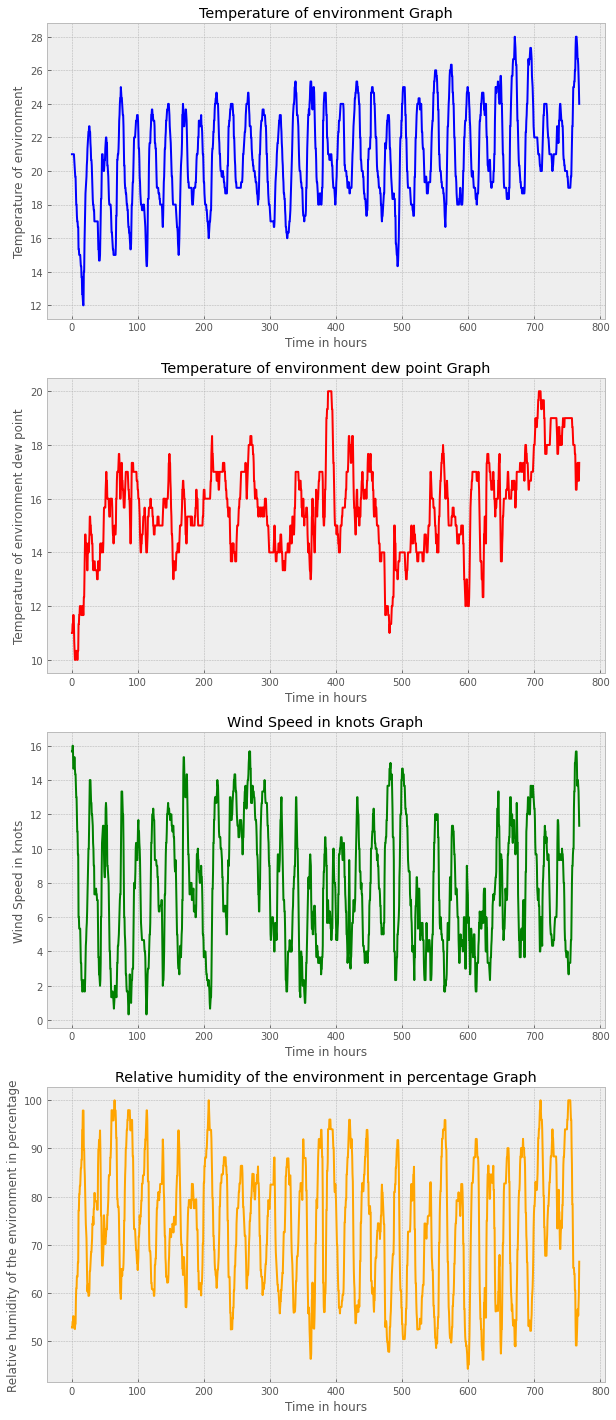

In [432]:
# Plotting our predictions.
# this shows the predictions over a month.
plt.style.use('bmh')
fig1, (tempenv, tempdew, spdk, humid) = plt.subplots(nrows=4,ncols=1, squeeze = True)

tempenv.plot(prediction_df["valid"],prediction_df["tmpc"] , color='blue')
tempenv.set_title("Temperature of environment Graph")
tempenv.set_xlabel("Time in hours")
tempenv.set_ylabel("Temperature of environment")


tempdew.plot(prediction_df["valid"],prediction_df["dwpc"] ,  color='red')
tempdew.set_title("Temperature of environment dew point Graph")
tempdew.set_xlabel("Time in hours")
tempdew.set_ylabel("Temperature of environment dew point")


spdk.plot(prediction_df["valid"],prediction_df["sknt"], color='green')
spdk.set_title("Wind Speed in knots Graph")
spdk.set_xlabel("Time in hours")
spdk.set_ylabel("Wind Speed in knots")

humid.plot(prediction_df["valid"],prediction_df["relh"], color='orange')
humid.set_title("Relative humidity of the environment in percentage Graph")
humid.set_xlabel("Time in hours")
humid.set_ylabel("Relative humidity of the environment in percentage")

fig1.set_size_inches(10,25)
fig1.show()

# Conclusion

## Comment on your model performance.
<p> We used the KNN model which yielded an accuracy of 0.94</p>

## Anything interesting about the data analysis.
<p></p>